# Ряды динамики

\- ряды, в котором приведены данные в хронологической последовательности для каждой единицы выборочной совокупности (Банки) либо без них.

Есть всегда период/момент и его уровень (значение).

| banks | 2000 | 2001 | 2002 | 2003 |
|-------|------|------|------|------|
| 1     | 1232 | 2344 | 2344 | 2344 |
| 2     | 1232 | 2344 | 2344 | 2344 |
| 3     | 3453 | 2344 | 2344 | 2344 |
| 4     | 4444 | 2344 | 2344 | 2344 |

| год | сумма |
|-----|-------|
|2000 |202000 |
|2001 |202000 |
|2002 |202000 |
|2003 |202000 |

Общим признаком яв-ся например выручка.

Во второй таблице года яв-ся выборочной совокупностью.

Для каждого ряда динамики считают показатели изменений его уровней (как цепным так и базисным способом):

- абс. прирост (y1 - y0) - показаывает скорость роста в абс. величинах.
- темп роста (y1 / y0 * 100%) - показывает скорость роста в отн. величинах.
- темп прироста (темп роста - 100%) - показывает на какую величину увеличилось в отн. величинах.
- абс. значение 1% прироста (y1/100) - считается только цепным и показывает значение признака в 1% прироста.

Также для динмачиескиго ряда вычисляют сред. показатели:

- ср. абс. прирост (yк-yн/n-1) - показывает ср. скорость роста в абс. величинах.
- ср. темп роста (ср. геом./ср. коэф. роста * 100%) - показывает ср. скорость в отн. величинах.

### Задача 1

Имеются данные о производстве и потреблении электроэнергии в РФ, млрд. кВт-ч.
1995 1996 1997 1998 1999 2000 2001 2002 2003
Потреблено электроэнергии 840,4 827,7 814,4 809,1 832,1 863,7 875,4 878,4 879,2
Рассчитать цепные, базисные и средние показатели динамики.

In [1]:
import pandas as pd
import numpy as np

In [2]:
timeline_data = tuple(map(lambda x: float(x.replace(",", ".")),
                          "840,4 827,7 814,4 809,1 832,1 863,7 875,4 878,4 879,2".split()))
timeline = range(1995, 2004)

In [3]:
data = pd.DataFrame({
    'потреблено, млрд квт-ч': timeline_data},
    index=timeline
)
data.index.name = 'year'
data

,"потреблено, млрд квт-ч"
year,
1995,840.4
1996,827.7
1997,814.4
1998,809.1
1999,832.1
2000,863.7
2001,875.4
2002,878.4
2003,879.2


In [4]:
# показатели базовые
data_basis = data.copy()

data_basis['скорость роста, млрд квт-ч'] = np.NaN
data_basis['темп роста, %'] = np.NaN
data_basis['темп прироста, %'] = np.NaN

for i in data_basis.index[1:]:
    # скорость роста
    data_basis.loc[i, 'скорость роста, млрд квт-ч'] = data_basis.loc[i, 'потреблено, млрд квт-ч'] \
                                - data_basis.loc[data_basis.index.min(), 'потреблено, млрд квт-ч']
    # темп роста
    data_basis.loc[i, 'темп роста, %'] = data_basis.loc[i, 'потреблено, млрд квт-ч'] \
                        / data_basis.loc[data_basis.index.min(), 'потреблено, млрд квт-ч'] * 100
    
    # темп прироста
    data_basis.loc[i, 'темп прироста, %'] = data_basis.loc[i, 'темп роста, %'] - 100
    
    data_basis.loc[i] = data_basis.loc[i].round(2)

data_basis

,"потреблено, млрд квт-ч","скорость роста, млрд квт-ч","темп роста, %","темп прироста, %"
year,,,,
1995,840.4,NaN,NaN,NaN
1996,827.7,-12.7,98.49,-1.51
1997,814.4,-26.0,96.91,-3.09
1998,809.1,-31.3,96.28,-3.72
1999,832.1,-8.3,99.01,-0.99
2000,863.7,23.3,102.77,2.77
2001,875.4,35.0,104.16,4.16
2002,878.4,38.0,104.52,4.52
2003,879.2,38.8,104.62,4.62


In [5]:
# показатели цепные
data_chain = data.copy()

data_chain['скорость роста, млрд квт-ч'] = np.NaN
data_chain['темп роста, %'] = np.NaN
data_chain['темп прироста, %'] = np.NaN
data_chain['абс. значение 1% прироста, млрд квт-ч'] = np.NaN

for i in data_chain.index[1:]:
    # скорость роста
    data_chain.loc[i, 'скорость роста, млрд квт-ч'] = data_chain.loc[i, 'потреблено, млрд квт-ч'] \
                                - data_chain.loc[i - 1, 'потреблено, млрд квт-ч']
    # темп роста
    data_chain.loc[i, 'темп роста, %'] = data_chain.loc[i, 'потреблено, млрд квт-ч'] \
                        / data_chain.loc[i - 1, 'потреблено, млрд квт-ч'] * 100
    
    # темп прироста
    data_chain.loc[i, 'темп прироста, %'] = data_chain.loc[i, 'темп роста, %'] - 100
    
    # абс значение 1% прироста
    data_chain.loc[i, 'абс. значение 1% прироста, %'] = \
                                        data_chain.loc[i - 1, 'потреблено, млрд квт-ч'] / 100
    
    data_chain.loc[i] = data_chain.loc[i].round(2)

data_chain

,"потреблено, млрд квт-ч","скорость роста, млрд квт-ч","темп роста, %","темп прироста, %","абс. значение 1% прироста, %"
year,,,,,
1995,840.4,NaN,NaN,NaN,NaN
1996,827.7,-12.7,98.49,-1.51,8.40
1997,814.4,-13.3,98.39,-1.61,8.28
1998,809.1,-5.3,99.35,-0.65,8.14
1999,832.1,23.0,102.84,2.84,8.09
2000,863.7,31.6,103.80,3.80,8.32
2001,875.4,11.7,101.35,1.35,8.64
2002,878.4,3.0,100.34,0.34,8.75
2003,879.2,0.8,100.09,0.09,8.78


In [6]:
# средняя скорость роста
speed_average = (data.loc[data.index.max(), 'потреблено, млрд квт-ч'] \
                    - data.loc[data.index.min(), 'потреблено, млрд квт-ч']) / (len(data) - 1)

# средний темп роста
rate_average = pow(data.loc[data.index.max(), 'потреблено, млрд квт-ч'] \
            / data.loc[data.index.min(), 'потреблено, млрд квт-ч'], 1 / (len(data) - 1)) * 100

print('За период с 1995 по 2003 год в РФ потребление энергии увеличивалость в среднем '
     f'на {round(speed_average, 2)} млрд квт-ч или на {round(rate_average - 100, 2)}%')

За период с 1995 по 2003 год в РФ потребление энергии увеличивалость в среднем на 4.85 млрд квт-ч или на 0.57%


#### Задача 2

Известна среднегодовая численность занятых в экономике России (млн. чел.) 2000 2001 2002 2003 2004 75,3 70,9 63,8 64,3 68,7.
Вычислите показатели анализа ряда динамики на постоянной и переменных базах сравнения: абсолютные приросты, темпы роста и прироста, абсолютное значение 1% прироста, средний темп роста и прироста. Постройте график. Сделайте выводы. 

In [7]:
data = pd.DataFrame(
    np.array((75.3, 70.9, 63.8, 64.3, 68.7)), 
    index=np.arange(2000, 2005),
    columns=['среднегодовая численность занятых, млн чел.']
)
data

,"среднегодовая численность занятых, млн чел."
2000,75.3
2001,70.9
2002,63.8
2003,64.3
2004,68.7


In [8]:
# показатели базовые
data_basis = data.copy()

data_basis['скорость роста, млрд квт-ч'] = np.NaN
data_basis['темп роста, %'] = np.NaN
data_basis['темп прироста, %'] = np.NaN

for i in data_basis.index[1:]:
    # скорость роста
    data_basis.loc[i, 'скорость роста, млрд квт-ч'] = data_basis.loc[i, 'среднегодовая численность занятых, млн чел.'] \
        - data_basis.loc[data_basis.index.min(), 'среднегодовая численность занятых, млн чел.']
    # темп роста
    data_basis.loc[i, 'темп роста, %'] = data_basis.loc[i, 'среднегодовая численность занятых, млн чел.'] \
        / data_basis.loc[data_basis.index.min(), 'среднегодовая численность занятых, млн чел.'] * 100
    
    # темп прироста
    data_basis.loc[i, 'темп прироста, %'] = data_basis.loc[i, 'темп роста, %'] - 100
    
    data_basis.loc[i] = data_basis.loc[i].round(2)

data_basis

,"среднегодовая численность занятых, млн чел.","скорость роста, млрд квт-ч","темп роста, %","темп прироста, %"
2000,75.3,NaN,NaN,NaN
2001,70.9,-4.4,94.16,-5.84
2002,63.8,-11.5,84.73,-15.27
2003,64.3,-11.0,85.39,-14.61
2004,68.7,-6.6,91.24,-8.76


In [9]:
# показатели цепные
data_chain = data.copy()

data_chain['скорость роста, млрд квт-ч'] = np.NaN
data_chain['темп роста, %'] = np.NaN
data_chain['темп прироста, %'] = np.NaN
data_chain['абс. значение 1% прироста, млрд квт-ч'] = np.NaN

for i in data_chain.index[1:]:
    # скорость роста
    data_chain.loc[i, 'скорость роста, млрд квт-ч'] = data_chain.loc[i, 'среднегодовая численность занятых, млн чел.'] \
                          - data_chain.loc[i - 1, 'среднегодовая численность занятых, млн чел.']
    # темп роста
    data_chain.loc[i, 'темп роста, %'] = data_chain.loc[i, 'среднегодовая численность занятых, млн чел.'] \
                        / data_chain.loc[i - 1, 'среднегодовая численность занятых, млн чел.'] * 100
    
    # темп прироста
    data_chain.loc[i, 'темп прироста, %'] = data_chain.loc[i, 'темп роста, %'] - 100
    
    # абс значение 1% прироста
    data_chain.loc[i, 'абс. значение 1% прироста, %'] = \
                            data_chain.loc[i - 1, 'среднегодовая численность занятых, млн чел.'] / 100
    
    data_chain.loc[i] = data_chain.loc[i].round(2)

data_chain

,"среднегодовая численность занятых, млн чел.","скорость роста, млрд квт-ч","темп роста, %","темп прироста, %","абс. значение 1% прироста, %"
2000,75.3,NaN,NaN,NaN,NaN
2001,70.9,-4.4,94.16,-5.84,0.75
2002,63.8,-7.1,89.99,-10.01,0.71
2003,64.3,0.5,100.78,0.78,0.64
2004,68.7,4.4,106.84,6.84,0.64


In [10]:
# средняя скорость роста
speed_average = (data.loc[data.index.max(), 'среднегодовая численность занятых, млн чел.'] \
    - data.loc[data.index.min(), 'среднегодовая численность занятых, млн чел.']) / (len(data) - 1)

# средний темп роста
rate_average = pow(data.loc[data.index.max(), 'среднегодовая численность занятых, млн чел.'] \
        / data.loc[data.index.min(), 'среднегодовая численность занятых, млн чел.'], 1 / (len(data) - 1)) * 100

print('За период с 2000 по 2004 год в РФ среднеднегодовая численность занятых уменьшалась '
     f'в среднем на {abs(round(speed_average, 2))} млн чел. или на {abs(round(rate_average - 100, 2))}%')

За период с 2000 по 2004 год в РФ среднеднегодовая численность занятых уменьшалась в среднем на 1.65 млн чел. или на 2.27%


Text(2003.2, 68.89999999999999, 'средняя')

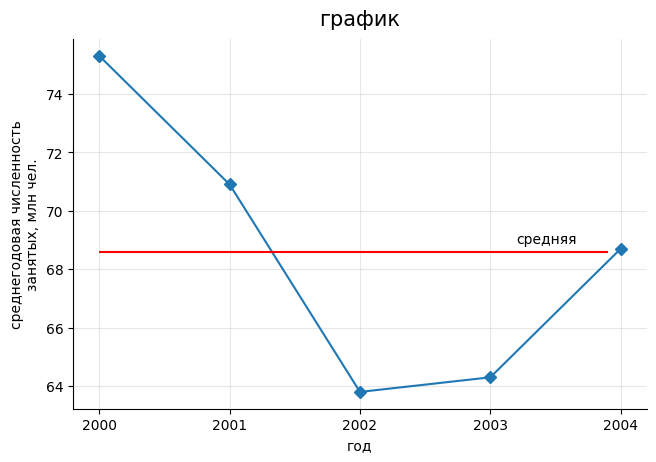

In [11]:
import matplotlib.pyplot as plt
import matplotlib.style as mstyle

# mstyle.use('seaborn-v0_8-deep')

figure, ax = plt.subplots(figsize=(7.4, 4.8))

ax.plot(data.index, data['среднегодовая численность занятых, млн чел.'], marker='D')

# axes captions
ax.set_xticks(data.index)
ax.set_yticks(range(62, 77, 2))
# grid
ax.grid(alpha=0.3)
# hide spines
ax.spines.top.set_visible(False)
ax.spines['right'].set_visible(False)

# add lables
ax.set_title('график', pad=10, fontsize=15)
ax.set_xlabel('год')
ax.set_ylabel('среднегодовая численность\nзанятых, млн чел.')

# add average
average = np.mean(data)
ax.hlines(average, 2000, 2003.9, colors='r')
ax.text(2003.2, average + 0.3, 'средняя')

### ЗАДАНИЕ 3
1. На основе исходных данных своего варианта построить линейную
диаграмму динамического ряда.
2. Рассчитать показатели динамики (цепные и базисные), результаты
представить в таблице.
3. Произвести выравнивание исходного динамического ряда методами:
укрупненных интервалов, скользящей средней, аналитического выравнивания
по уравнению прямой.
4. На графике исходного динамического ряда построить выравненные
данные по скользящей средней и по уравнению прямой.
5. Оценить устойчивость тенденции.
6. Сделать прогноз значения показателя на 2014 год.
После каждого пункта задания представить комментарии.

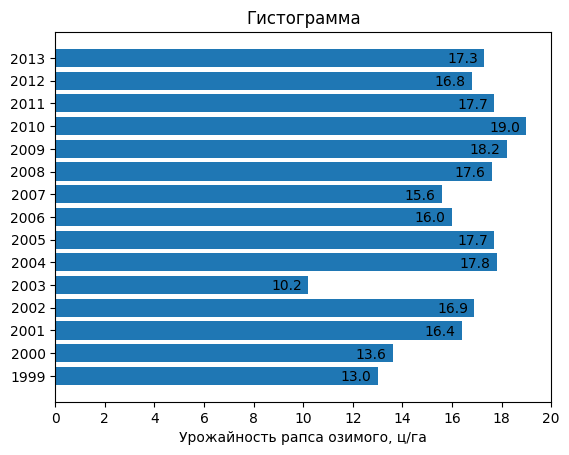

In [93]:
# гистограмма

fig, ax = plt.subplots()

y_pos = np.arange(len(source_data.index))
x_pos = source_data['Урожайность рапса озимого, ц/га'].values

ax.barh(y_pos, x_pos)

ax.set_yticks(y_pos, labels=source_data.index)
ax.set_xticks(np.arange(0, 21, 2))

# ax.invert_yaxis()
ax.set_xlabel('Урожайность рапса озимого, ц/га')
ax.set_title('Гистограмма')

for year in y_pos:
    s = source_data.loc[source_data.index[year], 'Урожайность рапса озимого, ц/га']
    x = source_data.loc[source_data.index[year], 'Урожайность рапса озимого, ц/га'] - 1.5
    y = year - 0.23
    ax.text(x, y, s)

In [55]:
# Таблица 1 – Урожайность рапса озимого по Российской Федерации 
# (в хозяйствах всех категорий; центнеров с одного гектара убранной площади).

source_data = pd.DataFrame({
    'Урожайность рапса озимого, ц/га': (13.0, 13.6, 16.4, 16.9, 10.2, 17.8, 17.7,
                                        16.0, 15.6, 17.6, 18.2, 19.0, 17.7, 16.8, 17.3)},
    index=(1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013)
)
source_data.index.name = 'year'
source_data

,"Урожайность рапса озимого, ц/га"
year,
1999,13.0
2000,13.6
2001,16.4
2002,16.9
2003,10.2
2004,17.8
2005,17.7
2006,16.0
2007,15.6


In [56]:
basis_data = source_data.copy()

column1 = 'Скорость роста, ц/га'
column2 = 'Темп роста, ц/га'
column3 = 'Темп прироста, ц/га'

basis_data[column1] = np.NaN
basis_data[column2] = np.NaN
basis_data[column3] = np.NaN

for year in basis_data.index[1:]:
    # скорость роста
    basis_data.loc[year, column1] = basis_data.loc[year, 'Урожайность рапса озимого, ц/га'] - \
                            basis_data.loc[basis_data.index.min(), 'Урожайность рапса озимого, ц/га']
    # темп роста
    basis_data.loc[year, column2] = basis_data.loc[year, 'Урожайность рапса озимого, ц/га'] / \
                            basis_data.loc[basis_data.index.min(), 'Урожайность рапса озимого, ц/га'] * 100
    # темп проироста
    basis_data.loc[year, column3] = basis_data.loc[year, column2] - 100
    
    basis_data.loc[year, :] = basis_data.loc[year, :].round(2)

basis_data

,"Урожайность рапса озимого, ц/га","Скорость роста, ц/га","Темп роста, ц/га","Темп прироста, ц/га"
year,,,,
1999,13.0,NaN,NaN,NaN
2000,13.6,0.6,104.62,4.62
2001,16.4,3.4,126.15,26.15
2002,16.9,3.9,130.00,30.00
2003,10.2,-2.8,78.46,-21.54
2004,17.8,4.8,136.92,36.92
2005,17.7,4.7,136.15,36.15
2006,16.0,3.0,123.08,23.08
2007,15.6,2.6,120.00,20.00


In [59]:
chain_data = source_data.copy()

column1 = 'Скорость роста, ц/га'
column2 = 'Темп роста, ц/га'
column3 = 'Темп прироста, ц/га'
column4 = 'Абс. значение 1% прироста, ц/га'

chain_data[column1] = np.NaN
chain_data[column2] = np.NaN
chain_data[column3] = np.NaN
chain_data[column4] = np.NaN

for year in chain_data.index[1:]:
    # скорость роста
    chain_data.loc[year, column1] = chain_data.loc[year, 'Урожайность рапса озимого, ц/га'] - \
                            chain_data.loc[year - 1, 'Урожайность рапса озимого, ц/га']
    # темп роста
    chain_data.loc[year, column2] = chain_data.loc[year, 'Урожайность рапса озимого, ц/га'] / \
                            chain_data.loc[year - 1, 'Урожайность рапса озимого, ц/га'] * 100
    # темп проироста
    chain_data.loc[year, column3] = chain_data.loc[year, column2] - 100
    
    # абс значение 1% прироста
    chain_data.loc[year, column4] = chain_data.loc[year - 1, 'Урожайность рапса озимого, ц/га'] / 100
    
    chain_data.loc[year, :] = chain_data.loc[year, :].round(2)

chain_data

,"Урожайность рапса озимого, ц/га","Скорость роста, ц/га","Темп роста, ц/га","Темп прироста, ц/га","Абс. значение 1% прироста, %"
year,,,,,
1999,13.0,NaN,NaN,NaN,NaN
2000,13.6,0.6,104.62,4.62,0.13
2001,16.4,2.8,120.59,20.59,0.14
2002,16.9,0.5,103.05,3.05,0.16
2003,10.2,-6.7,60.36,-39.64,0.17
2004,17.8,7.6,174.51,74.51,0.10
2005,17.7,-0.1,99.44,-0.56,0.18
2006,16.0,-1.7,90.40,-9.60,0.18
2007,15.6,-0.4,97.50,-2.50,0.16


In [98]:
# average_speed = (source_data.loc[data.index.max(), 'Урожайность рапса озимого, ц/га'] - \
#                 source_data.loc[data.index.min(), 'Урожайность рапса озимого, ц/га']) / len(source_data)

# average_rate = pow(source_data.loc[data.index.max(), 'Урожайность рапса озимого, ц/га'] / 
#                    source_data.loc[data.index.min(), 'Урожайность рапса озимого, ц/га'], 
#                    1 / (len(source_data) - 1)) * 100
# print('За период с 1999 по 2013 год в РФ урожайность озимого опса в среднем увеличиваласть на '
#      f'{round(average_speed, 2)} ц/га или на {round(average_rate - 100, 2)}%')
print('Исходя из цепных показателей абсолютного отклонения наблюдается как рост, так и снижение '
      'урожайности от года к году, поэтому тендекции к росту или падению не наблюдается, и средние '
      'величины не являются показательными')
print('За рассматриваемый период показатель урожайности был выше базового на всем промежутке времени, '
      'кроме 2003 года')

Исходя из цепных показателей абсолютного отклонения наблюдается как рост, так и снижение урожайности от года к году, поэтому тендекции к росту или падению не наблюдается, и средние величины не являются показательными
За рассматриваемый период покзатель урожайности был выше базового на всем промежутке, кроме 2003 года
